# ETAPA 1 - Construção da Rede Neural Convolucional

In [1]:
import tensorflow as tf
print("Versão do TensorFlow:", tf.__version__)

Versão do TensorFlow: 2.1.0


In [2]:
import keras as K
print("Versão do Keras:", K.__version__)

Using TensorFlow backend.


Versão do Keras: 2.3.1


In [3]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from PIL import Image
from keras.optimizers import Adam

In [4]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

In [5]:
# Passo 1 - Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [6]:
# Passo 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Desativa 30% dos neuronios para evitar Overfiting
classifier.add(Dropout(0.3))

In [7]:
# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

In [8]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.3))

In [9]:
# Adicionando a Terceira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

In [10]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.3))

In [11]:
# Passo 3 - Flattening
classifier.add(Flatten())

In [12]:
# Passo 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.5))


In [13]:
# Passo 5 - Camada de saida
classifier.add(Dense(units = 3, activation = 'sigmoid'))

In [14]:
# Compilando a rede
classifier.compile(optimizer = Adam(lr = 1e-3), loss = 'binary_crossentropy', metrics = ['accuracy'])

# ETAPA 2 - Treinamento da Rede Neural Convolucional

### Pré-Processamento

In [15]:
# Criando os objetos train_datagen e validation_datagen com as regras de pré-processamento das imagens
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(samplewise_center = False,
                                  samplewise_std_normalization=False,
                                  horizontal_flip=True,
                                  vertical_flip=False,
                                  height_shift_range=0.1,
                                  width_shift_range=0.1,
                                  brightness_range=[0.7,1.5],
                                  rotation_range=3,
                                  shear_range=0.01,
                                  fill_mode='nearest',
                                  zoom_range=0.125,
                                  rescale=1./255)


In [16]:
# Pré-processamento das imagens de treino e validação
import pandas as pd

train_data_df = pd.read_csv('dataset_train.csv', names=['files','class'], header=None, sep=';')
valid_data_df = pd.read_csv('dataset_validation.csv', names=['files','class'], header=None, sep=';')

In [17]:
train_generator = datagen.flow_from_dataframe(train_data_df, directory=None, x_col='files', y_col='class', class_mode='categorical',
                                             target_size = (64,64), batch_size = 8)
train_generator.class_indices


Found 3850 validated image filenames belonging to 3 classes.


{'Antracnose': 0, 'Oidio': 1, 'Saudavel': 2}

In [18]:
valid_generator = datagen.flow_from_dataframe(valid_data_df, directory=None, x_col='files', y_col='class', class_mode='categorical',
                                             target_size = (64,64), batch_size = 8)

Found 1100 validated image filenames belonging to 3 classes.


### Treinamento

In [19]:
reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)

C:\Users\Eduardo Marques\Anaconda3\envs\tensorflow_cpu\lib\site-packages\keras\callbacks\callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [20]:
checkpoint = ModelCheckpoint('Modelo_Phatology_Final.hdf5', monitor = 'val_loss', verbose =1 , mode= 'min', save_best_only=True)

early_stop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, mode=min, verbose=1)

C:\Users\Eduardo Marques\Anaconda3\envs\tensorflow_cpu\lib\site-packages\keras\callbacks\callbacks.py:788: RuntimeWarning: EarlyStopping mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


In [22]:
# Executando o treinamento 

STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size 
STEP_SIZE_VALID = valid_generator.n // valid_generator.batch_size

history = classifier.fit_generator(train_generator,
                         steps_per_epoch = STEP_SIZE_TRAIN,
                         epochs = 10,
                         validation_data = valid_generator,
                         validation_steps = STEP_SIZE_VALID,
                         callbacks=[checkpoint, early_stop, reduceLROnPlat],
                                   workers = 3)

Epoch 1/10
481/481 [==============================] - 137s 284ms/step - loss: 0.2194 - accuracy: 0.9097 - val_loss: 0.0127 - val_accuracy: 0.9626

Epoch 00001: val_loss improved from inf to 0.01275, saving model to Modelo_Phatology_Final.hdf5
Epoch 2/10
481/481 [==============================] - 95s 197ms/step - loss: 0.0752 - accuracy: 0.9769 - val_loss: 0.0365 - val_accuracy: 0.9814

Epoch 00002: val_loss did not improve from 0.01275
Epoch 3/10
481/481 [==============================] - 79s 163ms/step - loss: 0.0585 - accuracy: 0.9839 - val_loss: 0.0623 - val_accuracy: 0.9612

Epoch 00003: val_loss did not improve from 0.01275
Epoch 4/10
481/481 [==============================] - 72s 150ms/step - loss: 0.0423 - accuracy: 0.9877 - val_loss: 0.0123 - val_accuracy: 0.9774

Epoch 00004: val_loss improved from 0.01275 to 0.01229, saving model to Modelo_Phatology_Final.hdf5
Epoch 5/10
481/481 [==============================] - 76s 159ms/step - loss: 0.0372 - accuracy: 0.9894 - val_loss: 0.

In [23]:
classifier.summary()
 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)       

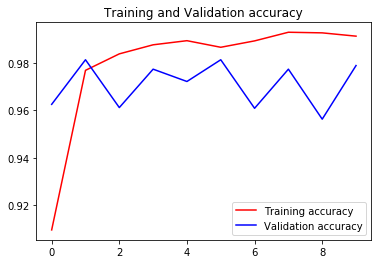

<Figure size 432x288 with 0 Axes>

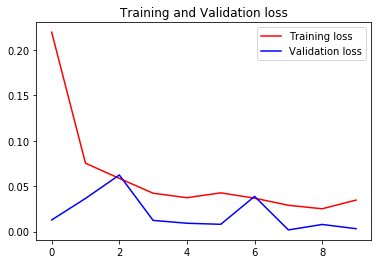

<Figure size 432x288 with 0 Axes>

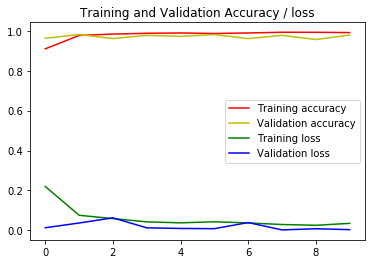

<Figure size 432x288 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()


epochs_loss = range(len(loss))

plt.plot(epochs_loss, loss, 'r', label='Training loss')
plt.plot(epochs_loss, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'y', label='Validation accuracy')
plt.plot(epochs_loss, loss, 'g', label='Training loss')
plt.plot(epochs_loss, val_loss, 'blue', label='Validation loss')
plt.title('Training and Validation Accuracy / loss')
plt.legend(loc=0)
plt.figure()

plt.show()

## ETAPA 3 - Testar modelo a partir de previsões

In [26]:
import pandas as pd
import numpy as np
path = 'dataset_test.csv'
df = pd.read_csv(path, names=['files','class'],header=None, sep=';')

from keras.preprocessing.image import load_img, img_to_array

imgs = []
for image_name in df['files'].values:
    img = load_img(image_name, target_size = (64,64), color_mode = 'rgb')
    img_array = img_to_array(img)
    img_array = img_array/64.
    imgs.append(img_array)
imgs = np.array(imgs)

In [27]:
y_predict = classifier.predict(imgs, verbose=1)

class_pred = []
for pred in y_predict:
    class_number = np.argmax(pred)
    if class_number == 0:
        class_pred.append('Antracnose')
    elif class_number == 1:
        class_pred.append('Oidio')
    else:
        class_pred.append('Saudavel')

905/905 [==============================] - 1s 1ms/step


In [28]:
y_true = df['class'].values

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, class_pred, target_names = ['Antracnose','Oidio','Saudavel']))

              precision    recall  f1-score   support

  Antracnose       0.57      0.64      0.60       174
       Oidio       0.84      0.82      0.83       445
    Saudavel       0.92      0.88      0.90       286

    accuracy                           0.81       905
   macro avg       0.78      0.78      0.78       905
weighted avg       0.81      0.81      0.81       905



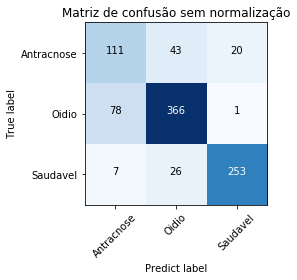

In [30]:
import itertools

class_names=['Antracnose','Oidio','Saudavel']
cm=confusion_matrix(y_true, class_pred)
title='Matriz de confusão sem normalização'
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(title)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j], 'd'),
            horizontalalignment="center",
            color="white" if cm[i,j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predict label')
plt.tight_layout()


# ETAPA 4 - Exportar modelo

In [37]:
#Salvando modelo .np 
import pickle

file_pathology = open('Modelo_patologia.np','wb')
pickle.dump(classifier, file_pathology)
file_pathology.close()

In [38]:
#Carregando modelo

import pickle

file_pathology = open('Modelo_patologia.np','rb')
cl = pickle.load(file_pathology)